# **Question #01: K-Means and DBSCAN Clustering**

## 1. Load and Preprocess the Dataset
1. Load the dataset using pandas.
2. Drop non-numeric columns (e.g., Customer_ID) if present.
3. Handle missing values by filling them with the median.
4. Normalize numerical features using StandardScaler to ensure proper clustering.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("kmeans_dataset.csv")

if 'Customer_ID' in df.columns:
    df.drop(columns=['Customer_ID'], inplace=True)

df.fillna(df.median(numeric_only=True), inplace=True)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_scaled.head()


,Age,Annual_Income,Spending_Score,Website_Visits,Product_Categories_Purchased,Total_Purchase_Amount,Average_Session_Duration,Return_Rate,Discount_Usage
0,0.571963,4.239384,-0.819049,-1.508791,0.581190,4.348212,0.142913,-0.025496,0.636349
1,1.382816,-0.084876,0.457281,1.304369,1.303164,-0.011700,-0.820275,0.714976,-1.183134
2,-0.051770,1.049117,-1.599028,-1.039931,-0.140785,-1.193214,-0.398880,1.746524,0.269852
3,-0.924996,-0.018335,1.414528,-0.219426,1.664151,-1.203980,0.203112,-1.311204,1.015483
4,0.821456,0.769445,-0.251791,0.483864,-0.862760,0.799273,-0.158083,-0.802174,0.030817


## 2. Determine the Optimal Number of Clusters (K)
 ## Elbow Method:
1. Train K-Means with different values of K.
2. Plot inertia (sum of squared distances) against K.
3. Identify the "elbow point" to find the optimal K.

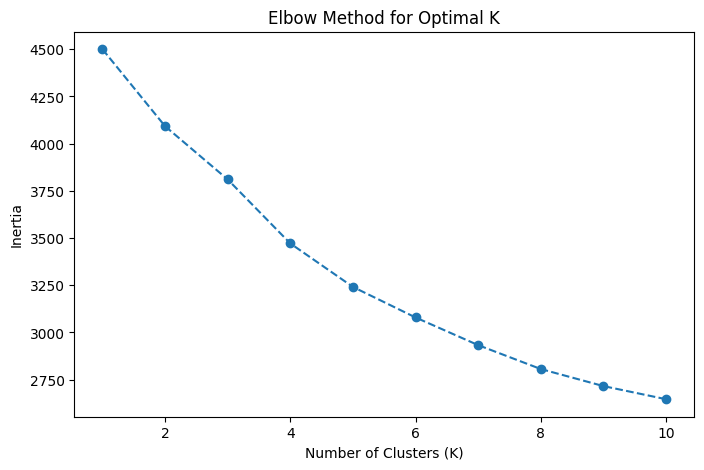

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


## Silhouette Score:
1. Compute silhouette scores for different K values.
2. Choose the K with the highest silhouette score.

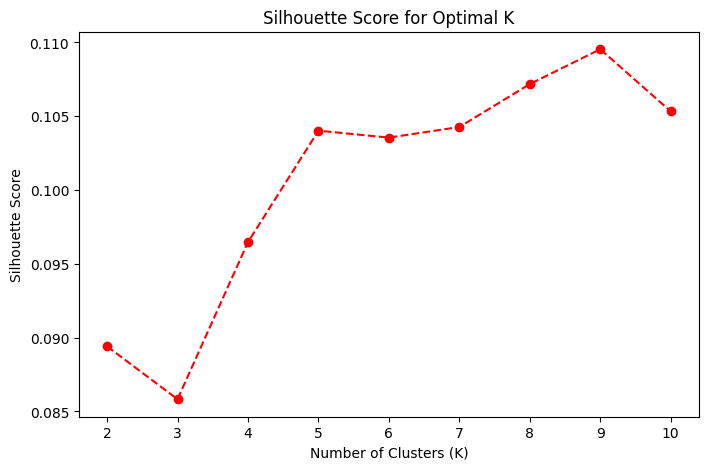

In [3]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, cluster_labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()


# 3. Apply K-Means Clustering
1. Perform K-Means clustering using the optimal K from Step 2.
2. Assign cluster labels to each data point.
3. Visualize clustering results using a scatter plot.

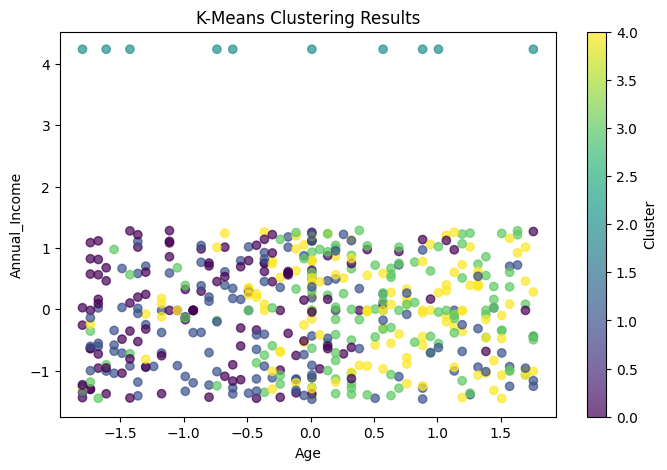

In [4]:

optimal_k = 5  


kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df_scaled['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel(df_scaled.columns[0])
plt.ylabel(df_scaled.columns[1])
plt.title("K-Means Clustering Results")
plt.colorbar(label="Cluster")
plt.show()


## 4. Cluster Interpretation
1. Compute the mean feature values per cluster to analyze cluster characteristics.
2. Interpret how different clusters differ based on feature distributions.

In [5]:

cluster_means = df.groupby(df_scaled['Cluster']).mean()


print("Cluster Characteristics:")
print(cluster_means)


Cluster Characteristics:
               Age  Annual_Income  Spending_Score  Website_Visits  \
Cluster                                                             
0        35.974359   85781.487179       63.316239       10.273504   
1        42.750000   69379.304688       27.710938       23.796875   
2        43.700000  299578.000000       34.000000       14.200000   
3        53.917355   82905.983471       77.140496       20.190083   
4        54.620968   83580.346774       31.629032        8.895161   

         Product_Categories_Purchased  Total_Purchase_Amount  \
Cluster                                                        
0                            7.042735           25953.978632   
1                            5.578125           26250.382812   
2                            5.700000           99756.000000   
3                            4.768595           25165.404959   
4                            4.217742           24921.883065   

         Average_Session_Duration  Return_

## 5. Handling Outliers
1. Detect outliers using Z-score method (values > 3 or < -3).
2. Remove detected outliers from the dataset.
3. Reapply K-Means clustering after removing outliers.
4. Compare results before and after outlier removal.

In [6]:
from scipy.stats import zscore
 
z_scores = df_scaled.iloc[:, :-1].apply(zscore)


outliers = (z_scores > 3) | (z_scores < -3)


print(outliers.sum())

# Remove outliers
df_scaled_no_outliers = df_scaled[~outliers.any(axis=1)]


Age                              0
Annual_Income                   10
Spending_Score                   0
Website_Visits                   0
Product_Categories_Purchased     0
Total_Purchase_Amount           10
Average_Session_Duration         0
Return_Rate                      0
Discount_Usage                   0
dtype: int64


## K-means Clustering after Removing Outliers

C:\Users\HP 840G4\AppData\Local\Temp\ipykernel_4668\3191105965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaled_no_outliers['Cluster'] = kmeans_no_outliers.fit_predict(df_scaled_no_outliers)


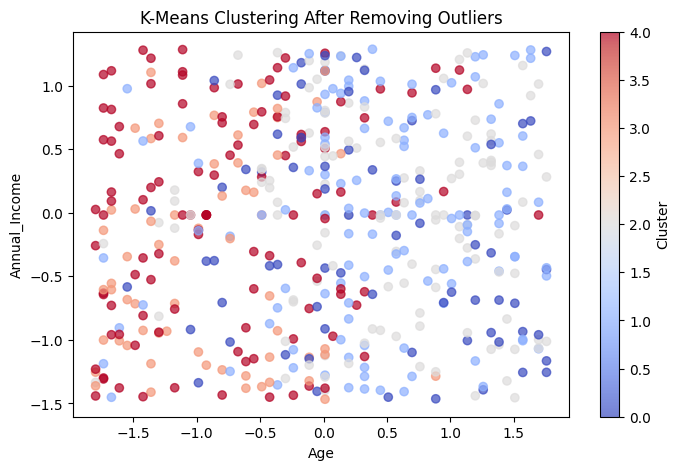

In [7]:

kmeans_no_outliers = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled_no_outliers['Cluster'] = kmeans_no_outliers.fit_predict(df_scaled_no_outliers)


plt.figure(figsize=(8, 5))
plt.scatter(df_scaled_no_outliers.iloc[:, 0], df_scaled_no_outliers.iloc[:, 1], c=df_scaled_no_outliers['Cluster'], cmap='coolwarm', alpha=0.7)
plt.xlabel(df_scaled_no_outliers.columns[0])
plt.ylabel(df_scaled_no_outliers.columns[1])
plt.title("K-Means Clustering After Removing Outliers")
plt.colorbar(label="Cluster")
plt.show()


## DBSCAN Clustering

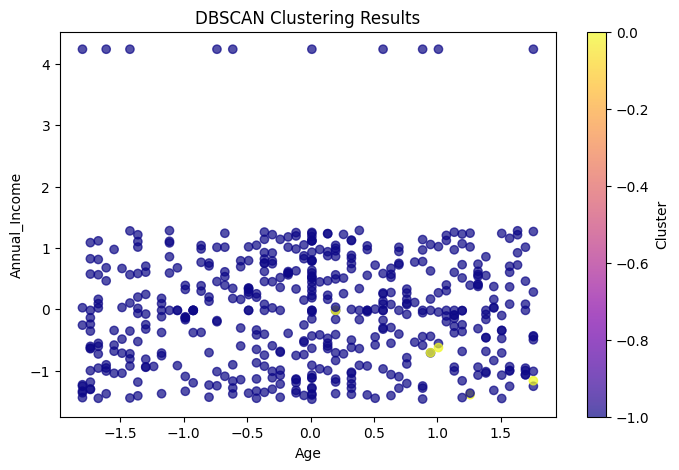

In [8]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=1.5, min_samples=5)
df_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled.iloc[:, :-1])


plt.figure(figsize=(8, 5))
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df_scaled['DBSCAN_Cluster'], cmap='plasma', alpha=0.7)
plt.xlabel(df_scaled.columns[0])
plt.ylabel(df_scaled.columns[1])
plt.title("DBSCAN Clustering Results")
plt.colorbar(label="Cluster")
plt.show()


## **6. Comparison with Other Clustering Algorithms**

### Implement **DBSCAN** Clustering:
1. Use eps=1.5 and min_samples=5 (or tune parameters).
2. Assign cluster labels using DBSCAN.
3. Visualize the DBSCAN clustering results.
### Compare **K-Means** vs. **DBSCAN**:
1. K-Means: Works well for spherical clusters when K is known.
2. DBSCAN: Handles arbitrary-shaped clusters and outliers well.
### Key Differences:
1. K-Means requires K, while DBSCAN does not.
2. DBSCAN is better at handling noise and non-uniform density.